In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import winsound
import warnings
warnings.filterwarnings("ignore")

In [2]:
def cramers_V(confusion_matrix):
    cm = confusion_matrix.values
    chi2 = stats.chi2_contingency(cm, correction=True)[0]
    p_value = stats.chi2_contingency(cm)[1]
    n = cm.sum()
    return [np.sqrt(chi2 / (n*(min(cm.shape)-1))), p_value ]

# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [3]:
# Загрузим данные  и посомтрим на них
data = pd.read_csv('orange_small_churn_data.txt')
labels = pd.read_csv('orange_small_churn_labels.txt', header = None, names=['label'])
data = pd.concat([data,labels], axis=1)
print(data.shape)
data.head(4)

(40000, 231)


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,label
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1


1.1 Обработка данных 

In [4]:
# Посмотрим, насколько велика доля пропусков в каждой из переменных
for var in data.columns:
    missed_rate = data[var].isna().sum()/data.shape[0]
    if missed_rate >= 0.95:
        print(var,'missed rate: ',missed_rate)

Var1 missed rate:  0.98575
Var2 missed rate:  0.97485
Var3 missed rate:  0.974875
Var4 missed rate:  0.968125
Var5 missed rate:  0.970875
Var8 missed rate:  1.0
Var9 missed rate:  0.98575
Var10 missed rate:  0.970875
Var11 missed rate:  0.974875
Var12 missed rate:  0.9884
Var14 missed rate:  0.974875
Var15 missed rate:  1.0
Var16 missed rate:  0.970875
Var17 missed rate:  0.968125
Var18 missed rate:  0.968125
Var19 missed rate:  0.968125
Var20 missed rate:  1.0
Var23 missed rate:  0.970875
Var26 missed rate:  0.970875
Var27 missed rate:  0.970875
Var29 missed rate:  0.98575
Var30 missed rate:  0.98575
Var31 missed rate:  1.0
Var32 missed rate:  1.0
Var33 missed rate:  0.9835
Var34 missed rate:  0.97485
Var36 missed rate:  0.97485
Var37 missed rate:  0.968125
Var39 missed rate:  1.0
Var40 missed rate:  0.97485
Var41 missed rate:  0.98575
Var42 missed rate:  1.0
Var43 missed rate:  0.97485
Var45 missed rate:  0.9929
Var46 missed rate:  0.97485
Var47 missed rate:  0.98575
Var48 missed rat

In [5]:
# Удалим все столбцы, состоящие только из NaN
deleted = []
for var in data.columns:
    if data[var].isna().sum() == data.shape[0]:
        data.drop(var, axis=1,inplace=True)
        deleted.append(var)
# В категориальных признаках заменим пропуски на новую категорию
data.loc[:,'Var191':] = data.loc[:,'Var191':].fillna('new_category')
np.array(deleted)

array(['Var8', 'Var15', 'Var20', 'Var31', 'Var32', 'Var39', 'Var42',
       'Var48', 'Var52', 'Var55', 'Var79', 'Var141', 'Var167', 'Var169',
       'Var175', 'Var185', 'Var209', 'Var230'], dtype='<U6')

In [6]:
data.Var57.isna().sum() # признак без пропусков - пригодится позднее

0

In [7]:
# Проверим есть ли значение 0.0001в данных, чтобы в дальнейшем заполнить им пропуски 
0.0001 in data.loc[:, 'Var1':'Var190'].values

False

In [8]:
# Создадим отдельный датасет и заполним пропуски нулями
# Это нужно для того, чтобы в дальнейшем считать корреляцию на данном датасете
X_numeric = data.loc[:, 'Var1':'Var190'].copy().fillna(0.0001)
X_numeric = pd.concat([X_numeric,data['label']], axis=1)

In [9]:
# Посмотрим, сколько уникальных значений в каждой из категориальных переменных
# Не будем учитывать в корреляции признаки, в которых больше 500 категорий
# (рекомендация с форума, число выбрано интуитивно на основе представленных ниже данных)
for var in data.loc[:,'Var191':'Var229'].columns:
    print(var, '- unique values -',len(data[var].unique()))

Var191 - unique values - 2
Var192 - unique values - 355
Var193 - unique values - 50
Var194 - unique values - 4
Var195 - unique values - 23
Var196 - unique values - 4
Var197 - unique values - 221
Var198 - unique values - 3891
Var199 - unique values - 4401
Var200 - unique values - 13298
Var201 - unique values - 3
Var202 - unique values - 5543
Var203 - unique values - 6
Var204 - unique values - 100
Var205 - unique values - 4
Var206 - unique values - 22
Var207 - unique values - 14
Var208 - unique values - 3
Var210 - unique values - 6
Var211 - unique values - 2
Var212 - unique values - 78
Var213 - unique values - 2
Var214 - unique values - 13298
Var215 - unique values - 2
Var216 - unique values - 1819
Var217 - unique values - 12471
Var218 - unique values - 3
Var219 - unique values - 23
Var220 - unique values - 3891
Var221 - unique values - 7
Var222 - unique values - 3891
Var223 - unique values - 5
Var224 - unique values - 2
Var225 - unique values - 4
Var226 - unique values - 23
Var227 - uni

2\. Рассчитайте доли классов `отток` и `не отток`.

In [10]:
not_churn = data.label.value_counts()[-1]
churn = data.label.value_counts()[1]

print('Доля класса "отток": ', churn/data.shape[0])
print('Доля класса "не отток": ', not_churn/data.shape[0])

Доля класса "отток":  0.0744
Доля класса "не отток":  0.9256


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

Из лекции: 

Для пар признаков, один из которых непрерывный, а другой — категориальный, вообще не
нужно считать никакой коэффициент корреляции.

$ X1 ∈ R$  и $X2 ∈ {0, 1} $ будут положительно коррелированы,если

$E (X1 | X2 = 1) > E (X1 | X2 = 0)$.
        
Таким образом, мерой силы взаимосвязи между $X1$ и $X2$ может служить просто разность этих математических ожиданий:
$E (X1 | X2 = 1) − E (X1 | X2 = 0)$

Эта величина не нормированная, она может меняться в любом диапазоне, от $−∞$ до $+∞$. Однако её гораздо
легче интерпретировать, чем коэффициент корреляции, который можно вычислить на такой паре выборок.


In [11]:
# Посчитаем корреляции для числовых признаков
numeric_corrs = []
for var in X_numeric.columns:
    var_churn = data.loc[data.label == 1,var]
    var_not_churn = data.loc[data.label == -1,var]
    numeric_corrs.append( (abs(var_churn.mean() - var_not_churn.mean()),var) )
# numeric_corrs = np.array(numeric_corrs)

In [12]:
print('10 наиболее коррелированных числовых признаков')
sorted(numeric_corrs, reverse=True)[:10]

10 наиболее коррелированных числовых признаков


[(10346077.81682243, 'Var131'),
 (480858.38842908666, 'Var69'),
 (438907.6790387182, 'Var53'),
 (401748.7452799191, 'Var177'),
 (320162.9532710281, 'Var180'),
 (241634.73453810182, 'Var114'),
 (193165.14612373244, 'Var111'),
 (162842.1845381444, 'Var113'),
 (151453.3519627573, 'Var153'),
 (141731.55887850467, 'Var154')]

In [13]:
# Для расчета корреляции между целевым признаком и категориальными переменными,
# используем коэффициент V Крамера. Для этого составим таблицу сопряженности
# Как было сказано ранее, не будем учитывать признаки где больше 500 категорий

category_corrs = []
for var in data.loc[:,'Var191':'Var229'].columns:
#     print(var,len(data[var].unique()), data[var].isna().sum())
    if len(data[var].unique()) <500:
        conf_matr = pd.pivot_table(data[[var,'label','Var57']], 
                                   index = var,
                                   columns='label',
                                   aggfunc='count')
        p_value = cramers_V(conf_matr)[1]
        if p_value > 0 :
            category_corrs.append((p_value,var))
# category_corrs = np.array(category_corrs)

In [14]:
print('10 наиболее коррелированных категориальных признаков')
sorted(category_corrs)[:10]

10 наиболее коррелированных категориальных признаков


[(1.156909709072425e-90, 'Var218'),
 (2.175743197501383e-45, 'Var205'),
 (9.669561756234243e-33, 'Var229'),
 (1.6457572165972684e-27, 'Var225'),
 (2.666712309698152e-24, 'Var227'),
 (8.606806305261868e-19, 'Var210'),
 (1.3425470630209822e-18, 'Var221'),
 (6.673380850485317e-11, 'Var226'),
 (1.6981394422988162e-10, 'Var211'),
 (9.189547460902363e-08, 'Var204')]

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [15]:
top_20_numeric = np.array(sorted(numeric_corrs, reverse=True))[:20,1]

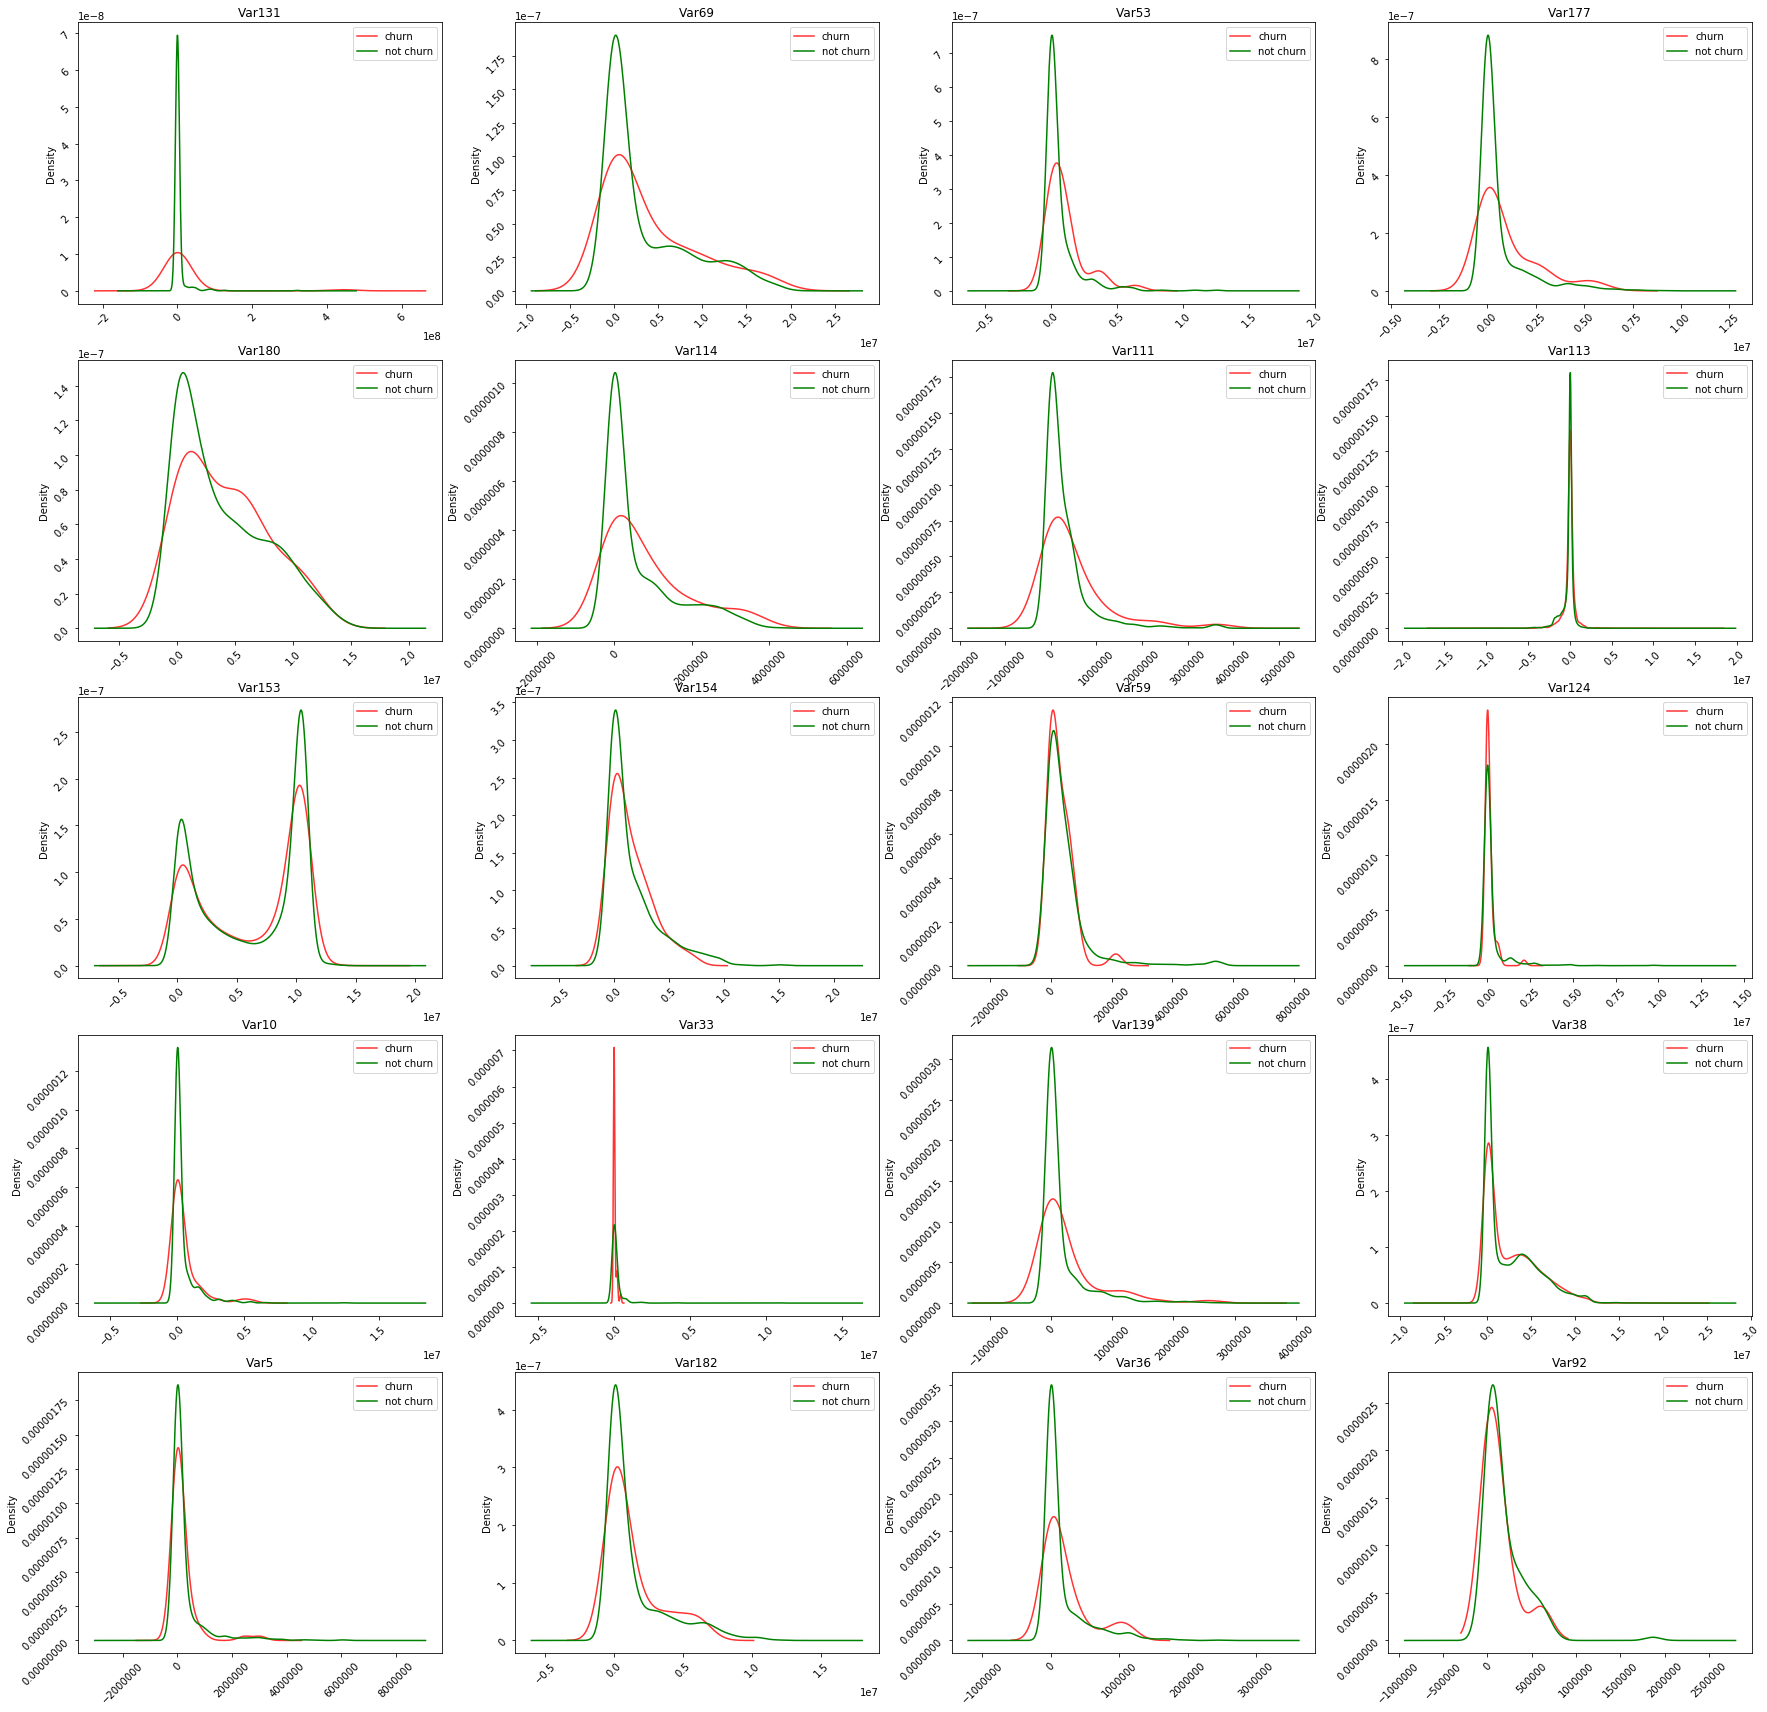

In [16]:
# Графики строятся на исходно датасете, потмоу что при заполнении
# пропусков графики получаются очень смещенными в сторону данного занчения
# Интересно все таки посмотреть как выглядит оригинальные данные 
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30, 30))
top_20_numeric
for i, var in enumerate(top_20_numeric):
#     print(var)
    data.loc[data.label==1,var].plot(kind='kde', ax=axes[i//4, i%4], alpha=0.8,color='r',label='churn', legend=True)
    data.loc[data.label==-1,var].plot(kind='kde', ax=axes[i//4, i%4], color='g',label='not churn',legend=True)
    axes[i//4, i%4].set_title(var)
    for xtick in axes[i//4, i%4].get_xticklabels():
        xtick.set_rotation(45)
        
    for ytick in axes[i//4, i%4].get_yticklabels():
        ytick.set_rotation(45)

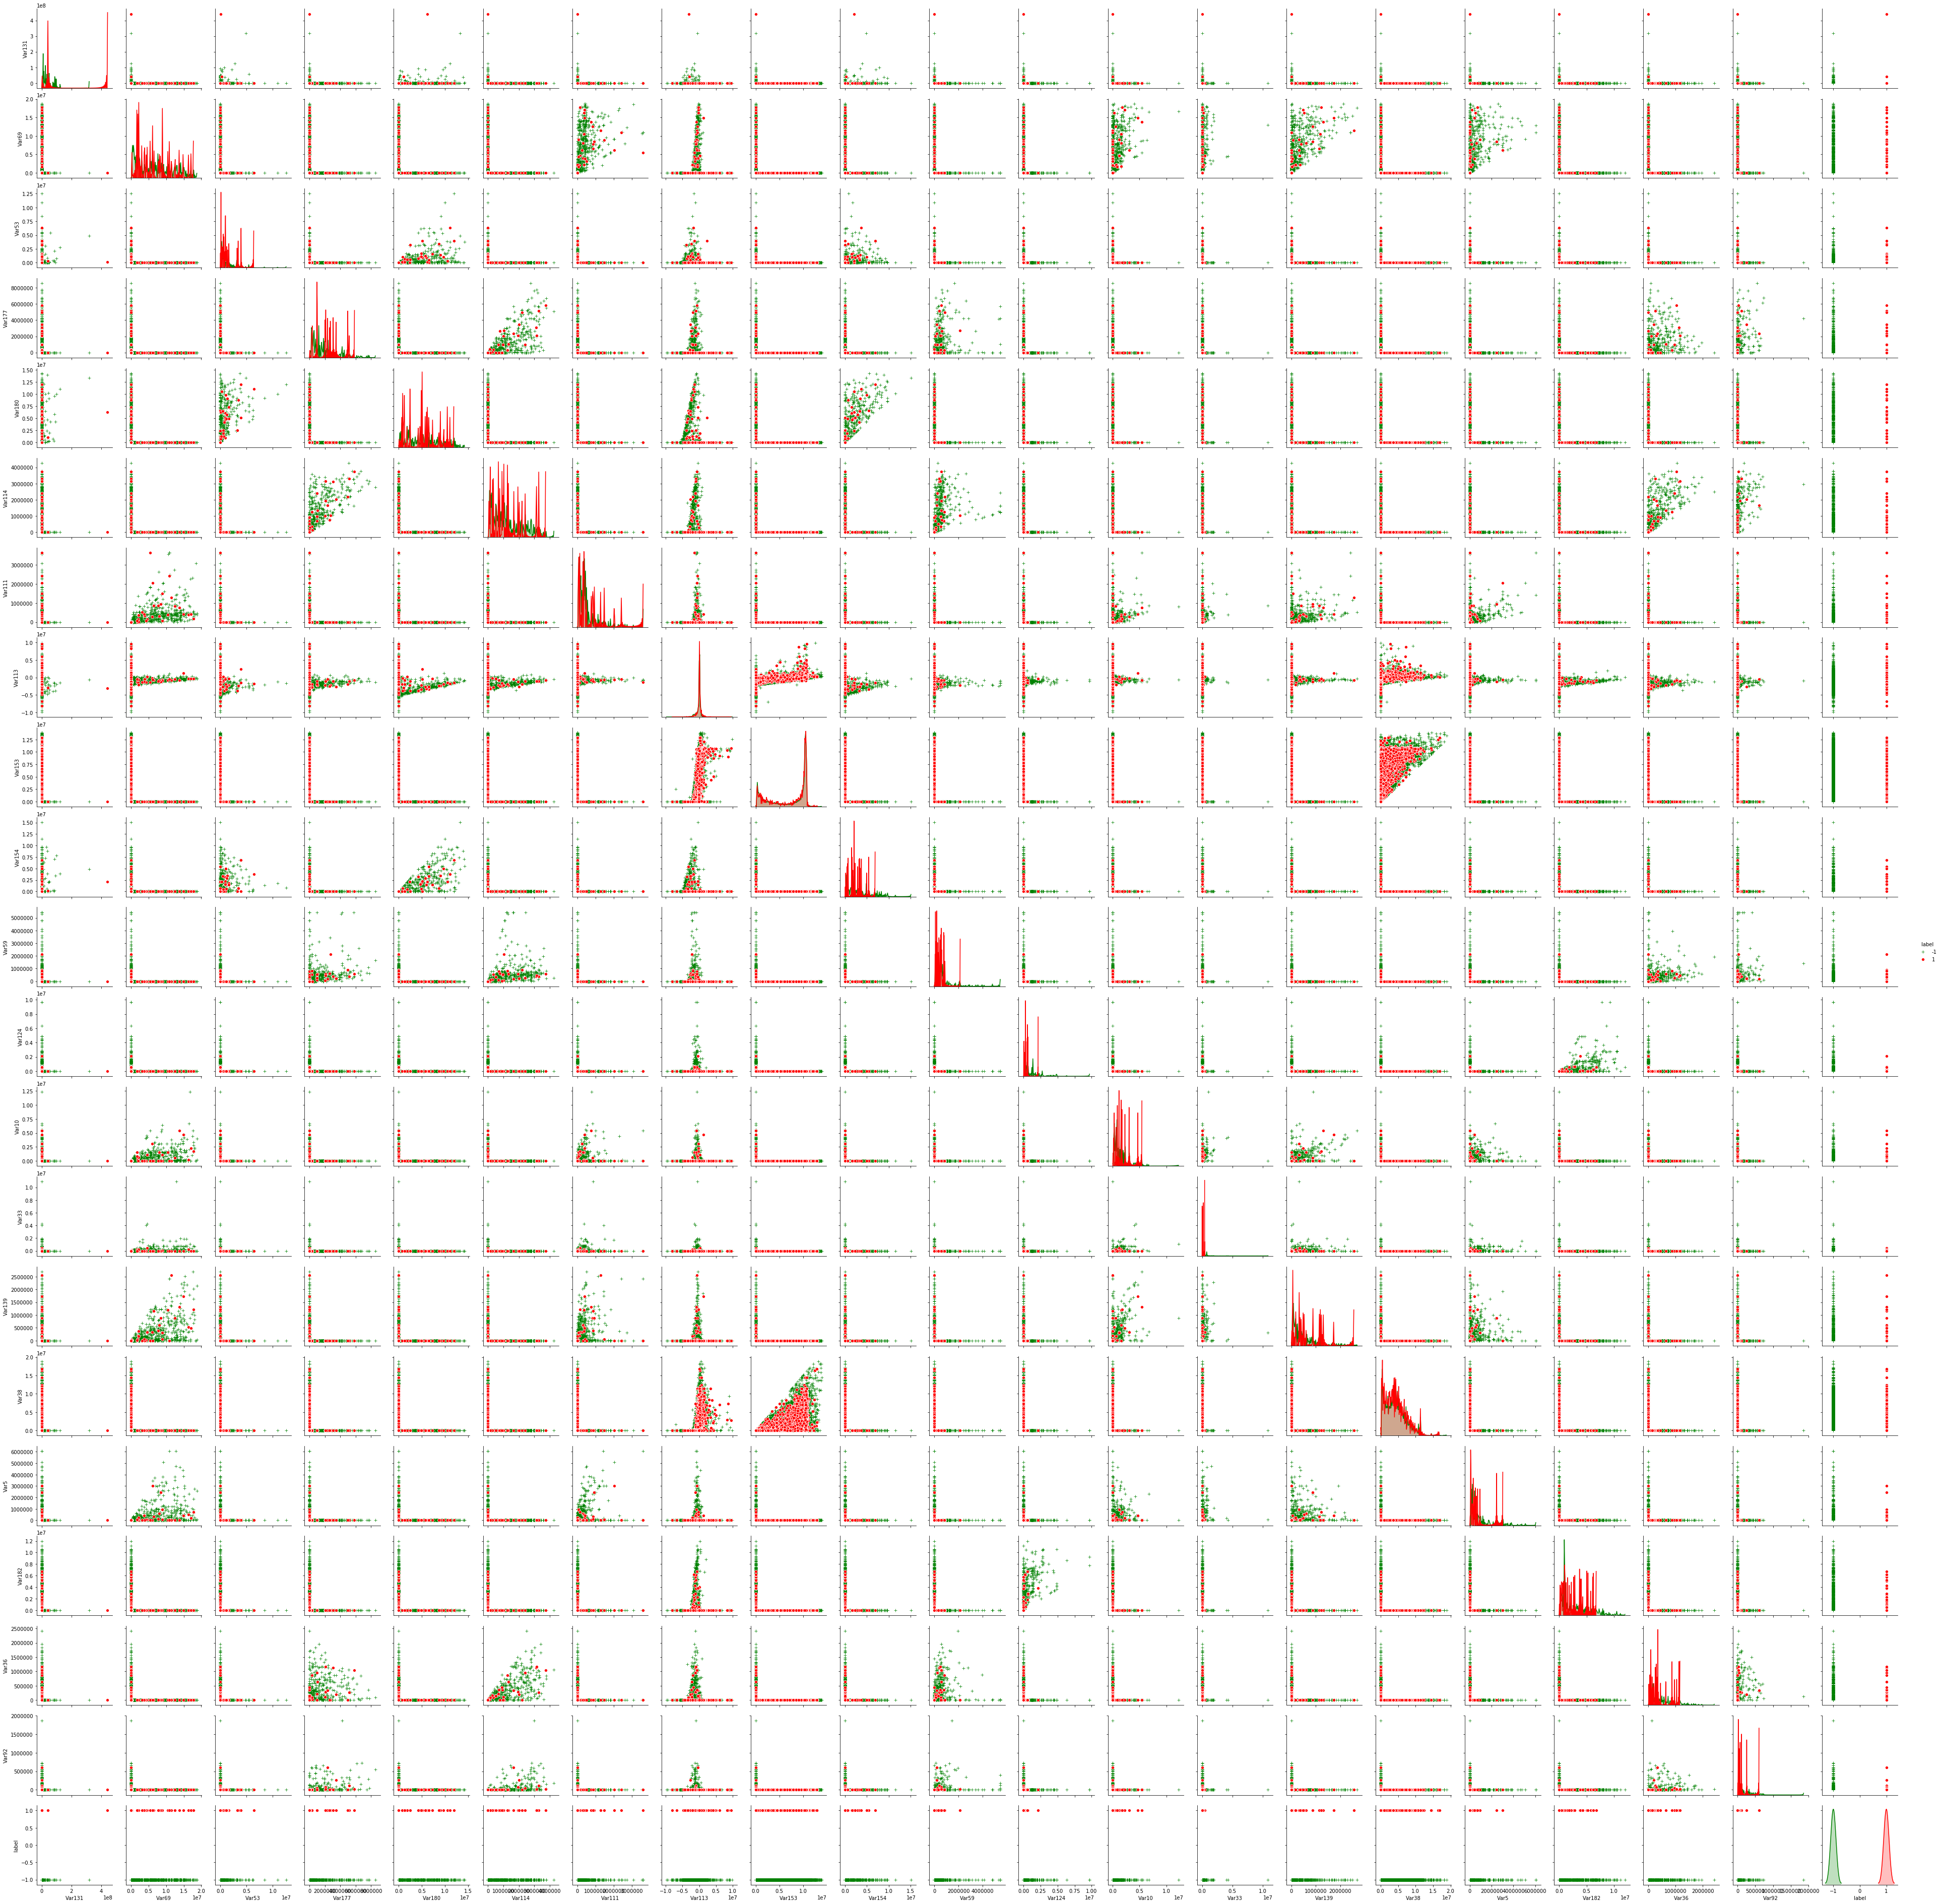

In [18]:
most_corr_num = top_20_numeric.tolist()+['label']
sns.pairplot(X_numeric[most_corr_num],
             hue='label',
             palette=['g','r'],
             markers=['+','o'],
             diag_kws={'bw':0.1})

In [19]:
winsound.Beep(300, 700)

5. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

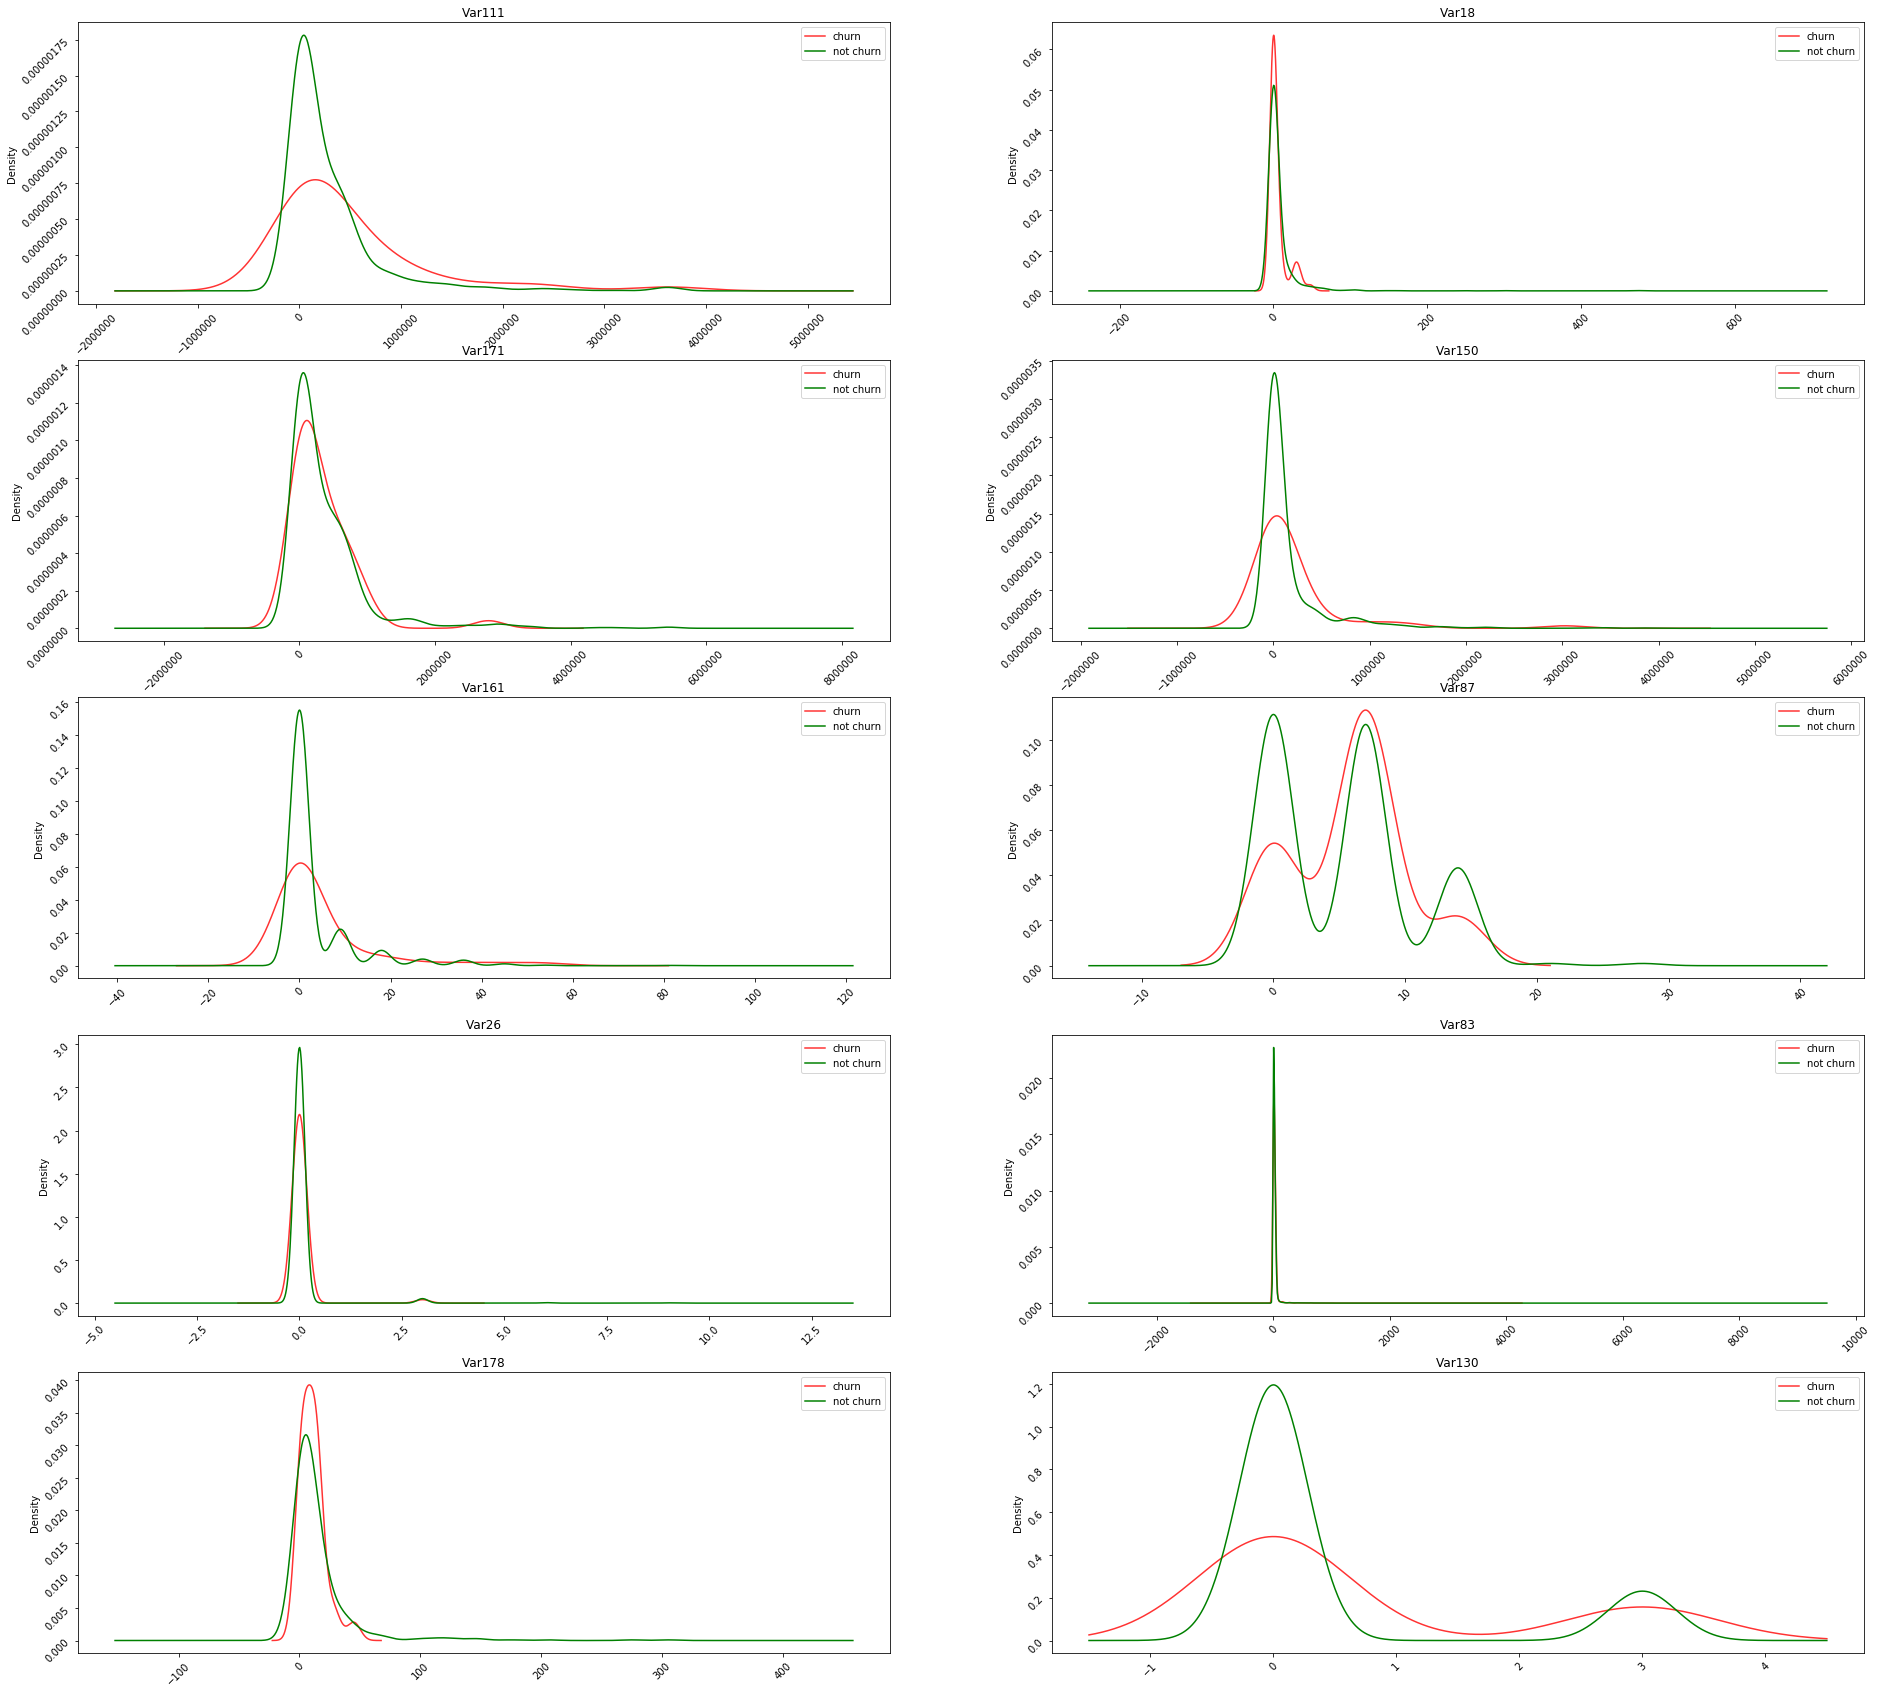

In [20]:
np.random.seed(20)
rand_numer_vars = np.random.choice(data.loc[:,:'Var190'].columns, 10)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(32, 30))
top_20_numeric
for i, var in enumerate(rand_numer_vars):
#     print(var)
    data.loc[data.label==1,var].plot(kind='kde', ax=axes[i//2, i%2], alpha=0.8,color='r',label='churn', legend=True)
    data.loc[data.label==-1,var].plot(kind='kde', ax=axes[i//2, i%2], color='g',label='not churn',legend=True)
    axes[i//2, i%2].set_title(var)
    for xtick in axes[i//2, i%2].get_xticklabels():
        xtick.set_rotation(45)
        
    for ytick in axes[i//2, i%2].get_yticklabels():
        ytick.set_rotation(45)

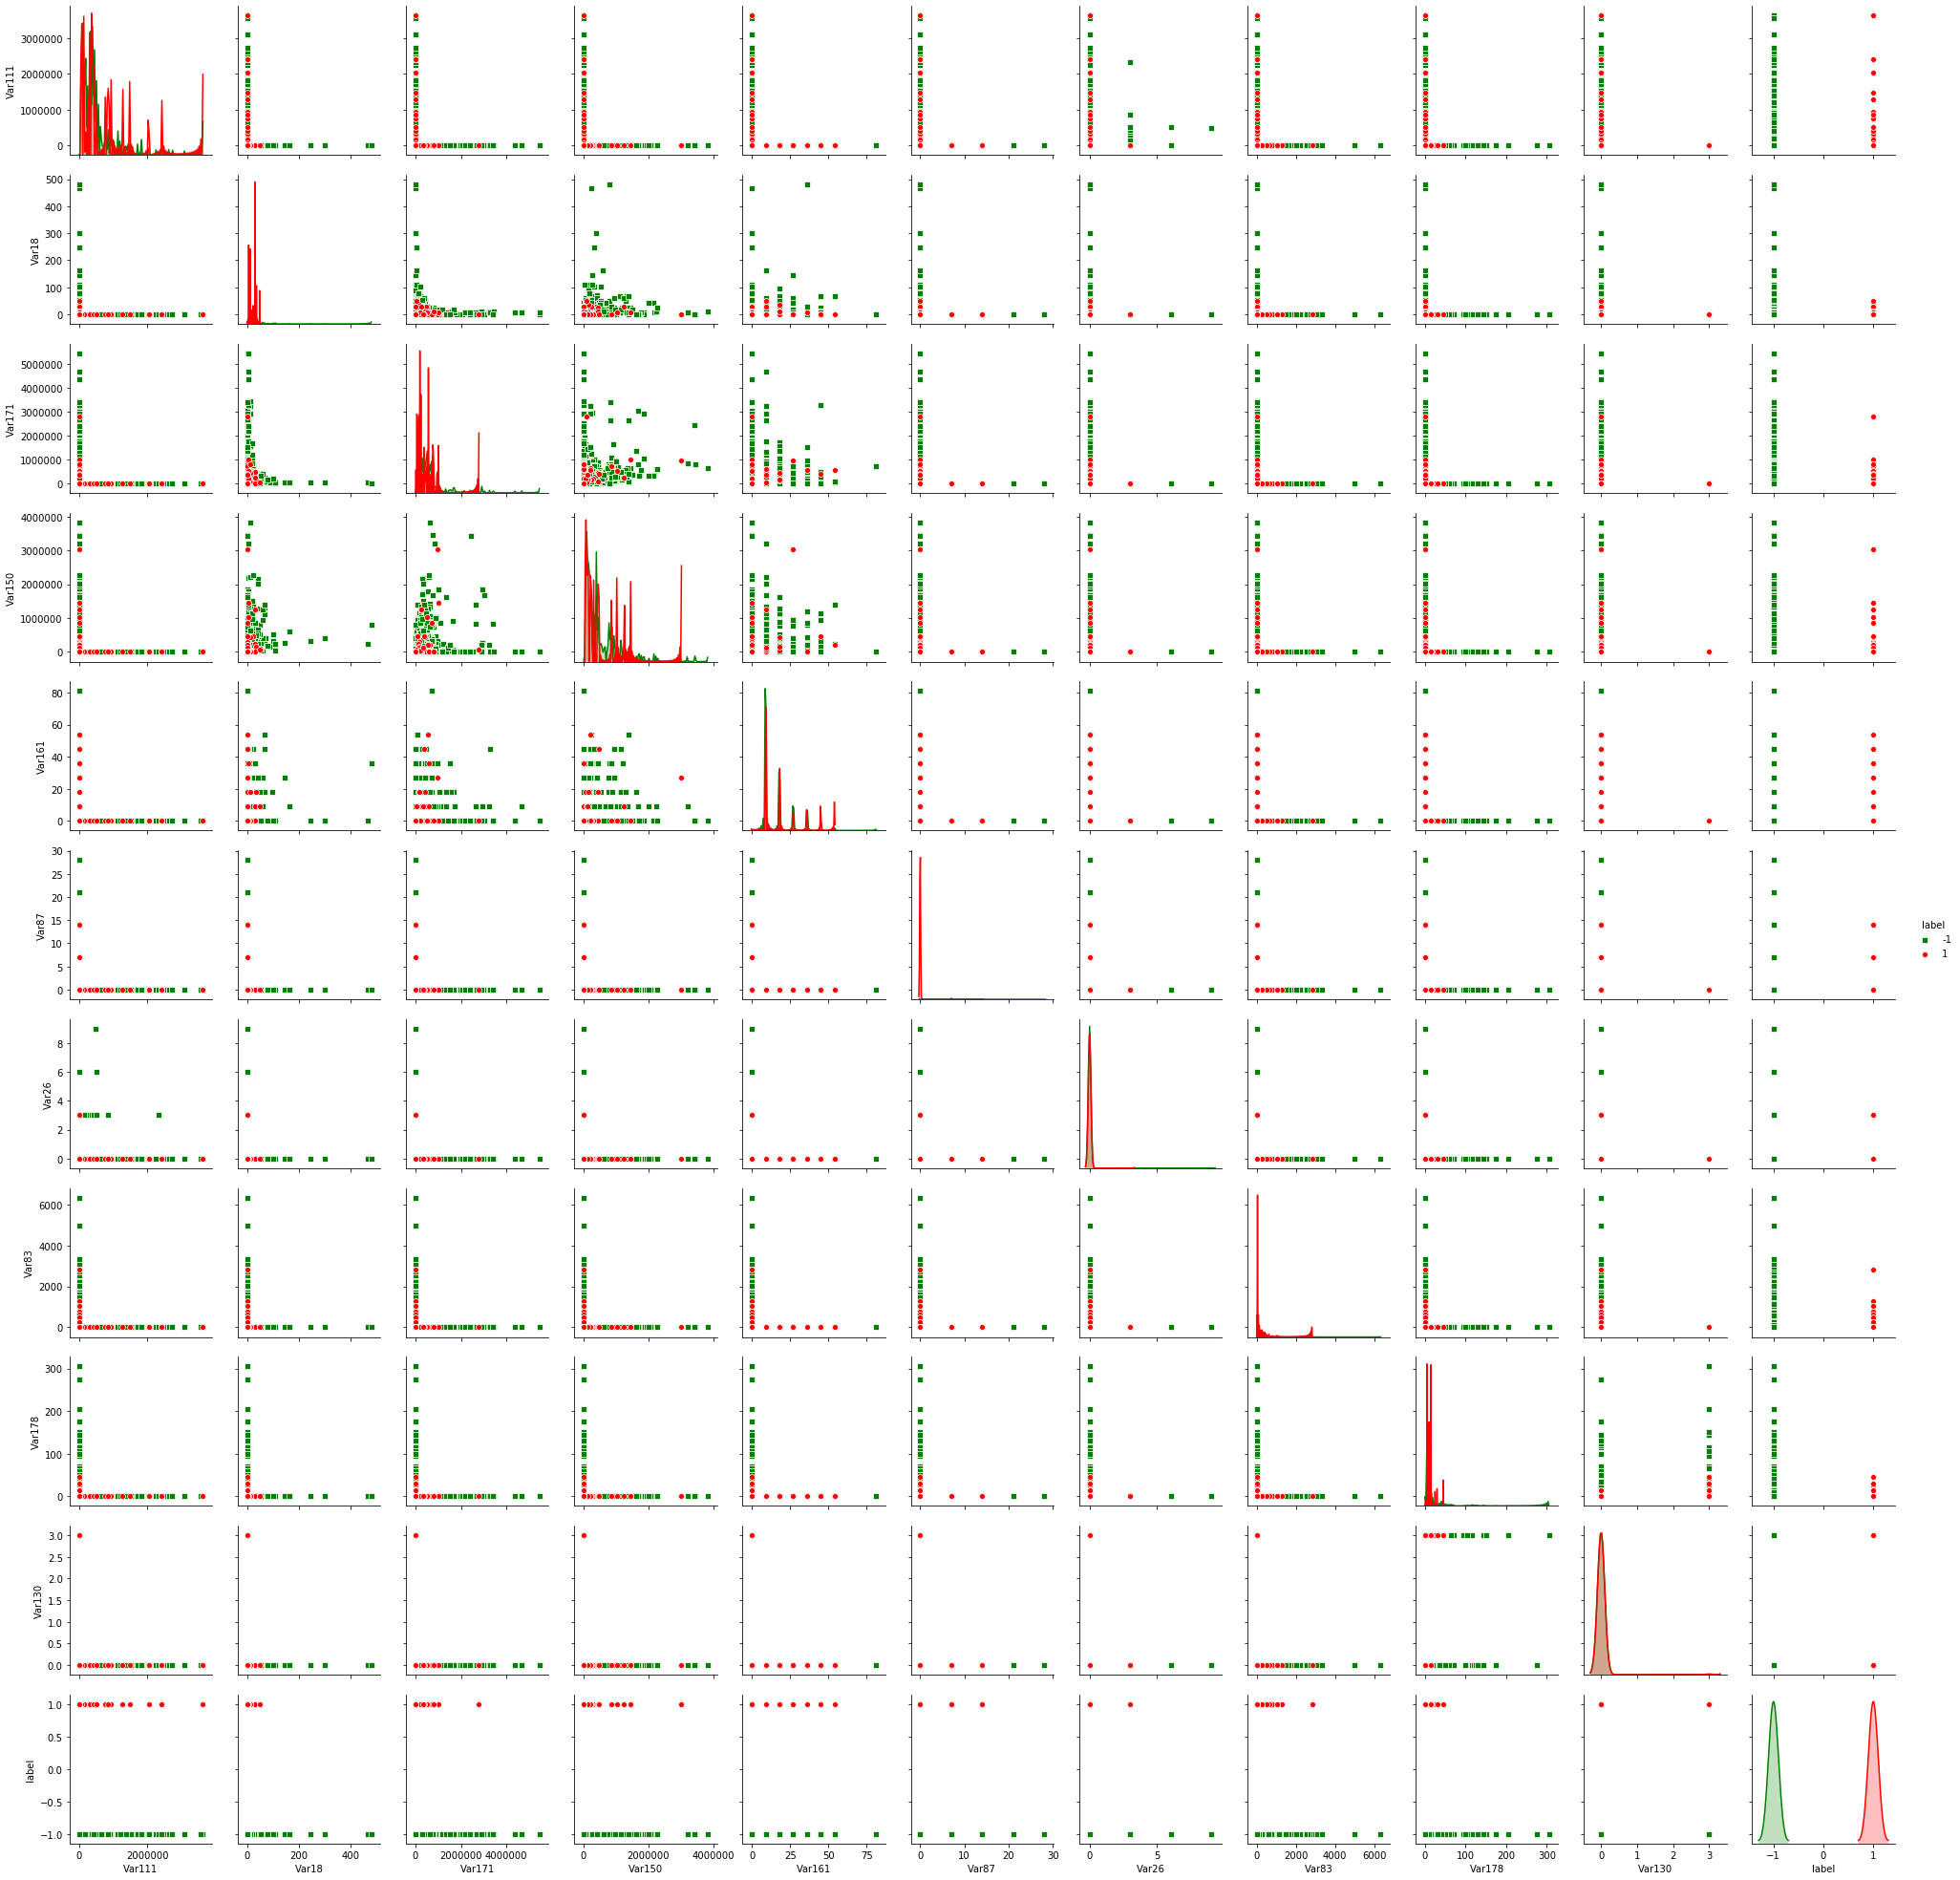

In [21]:
sns.pairplot(X_numeric[rand_numer_vars.tolist()+['label']],
             hue='label',
             markers=['s','o'],
             palette=['g','r'], 
             diag_kws={'bw':0.1})


In [22]:
winsound.Beep(300, 700)

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

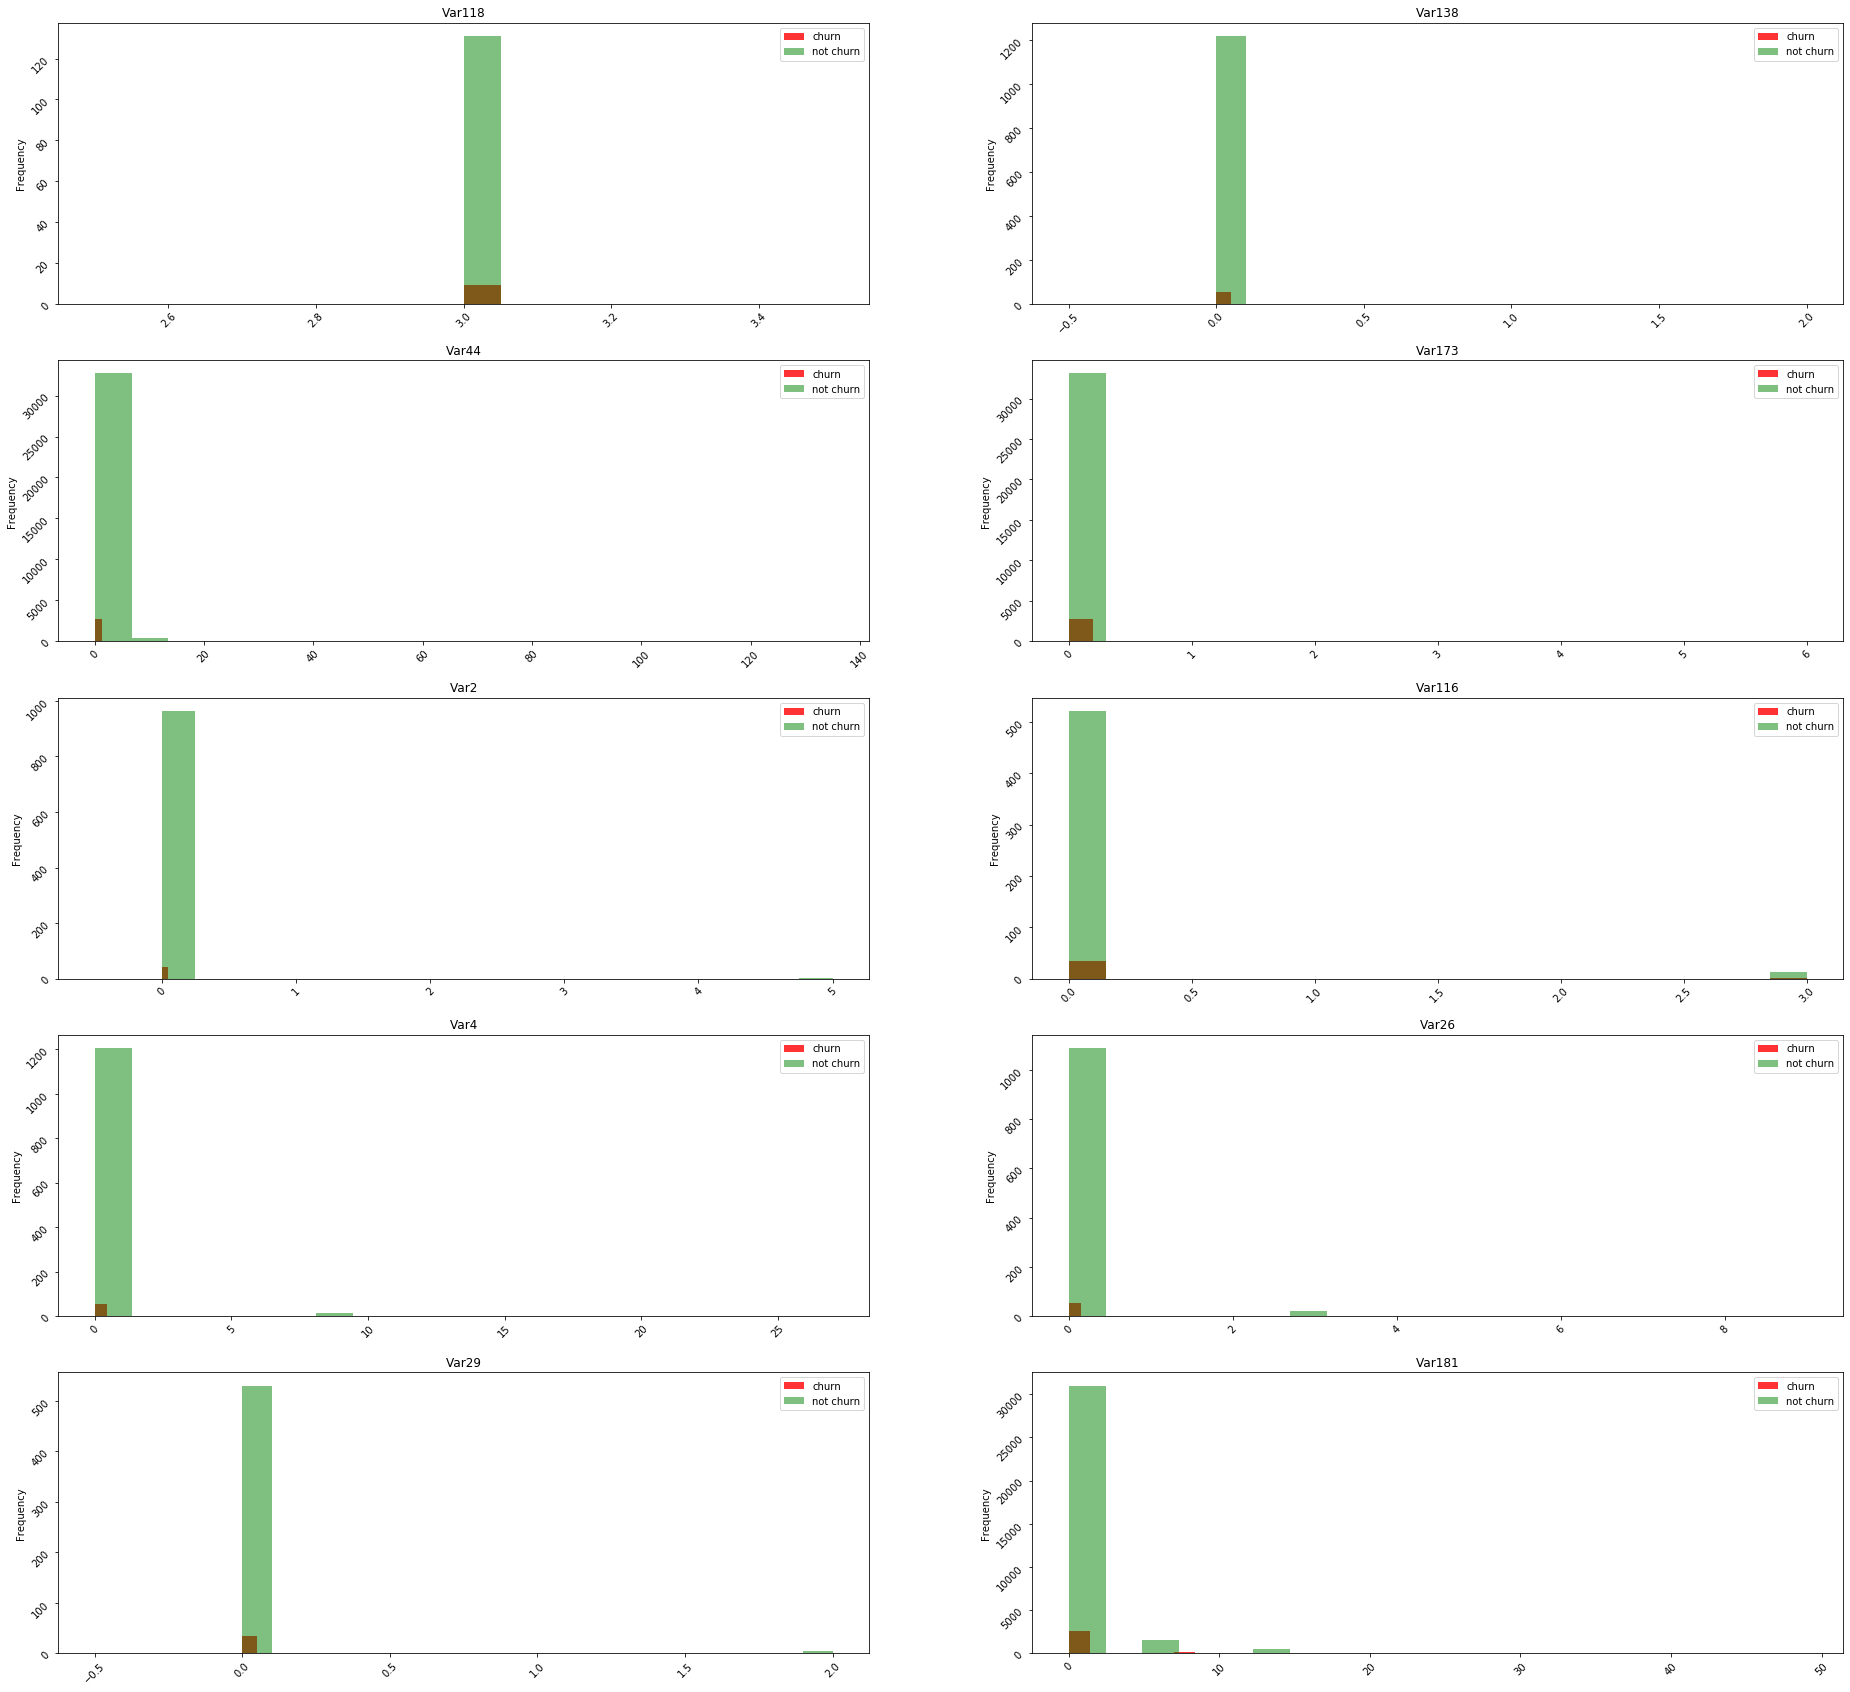

In [23]:
least_corr_num = np.array(sorted(numeric_corrs,
                                 reverse=False))[:10,1].tolist() + ['label']
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(32, 30))
for i, var in enumerate(least_corr_num[:-1]):
#     print(var)
    data.loc[data.label==1,var].plot(kind='hist', ax=axes[i//2, i%2],bins=20, 
                                     alpha=0.8,color='r',label='churn', legend=True)
    data.loc[data.label==-1,var].plot(kind='hist', ax=axes[i//2, i%2],bins=20, 
                                      alpha=0.5,color='g',label='not churn',legend=True)
    axes[i//2, i%2].set_title(var)
    for xtick in axes[i//2, i%2].get_xticklabels():
        xtick.set_rotation(45)
        
    for ytick in axes[i//2, i%2].get_yticklabels():
        ytick.set_rotation(45)

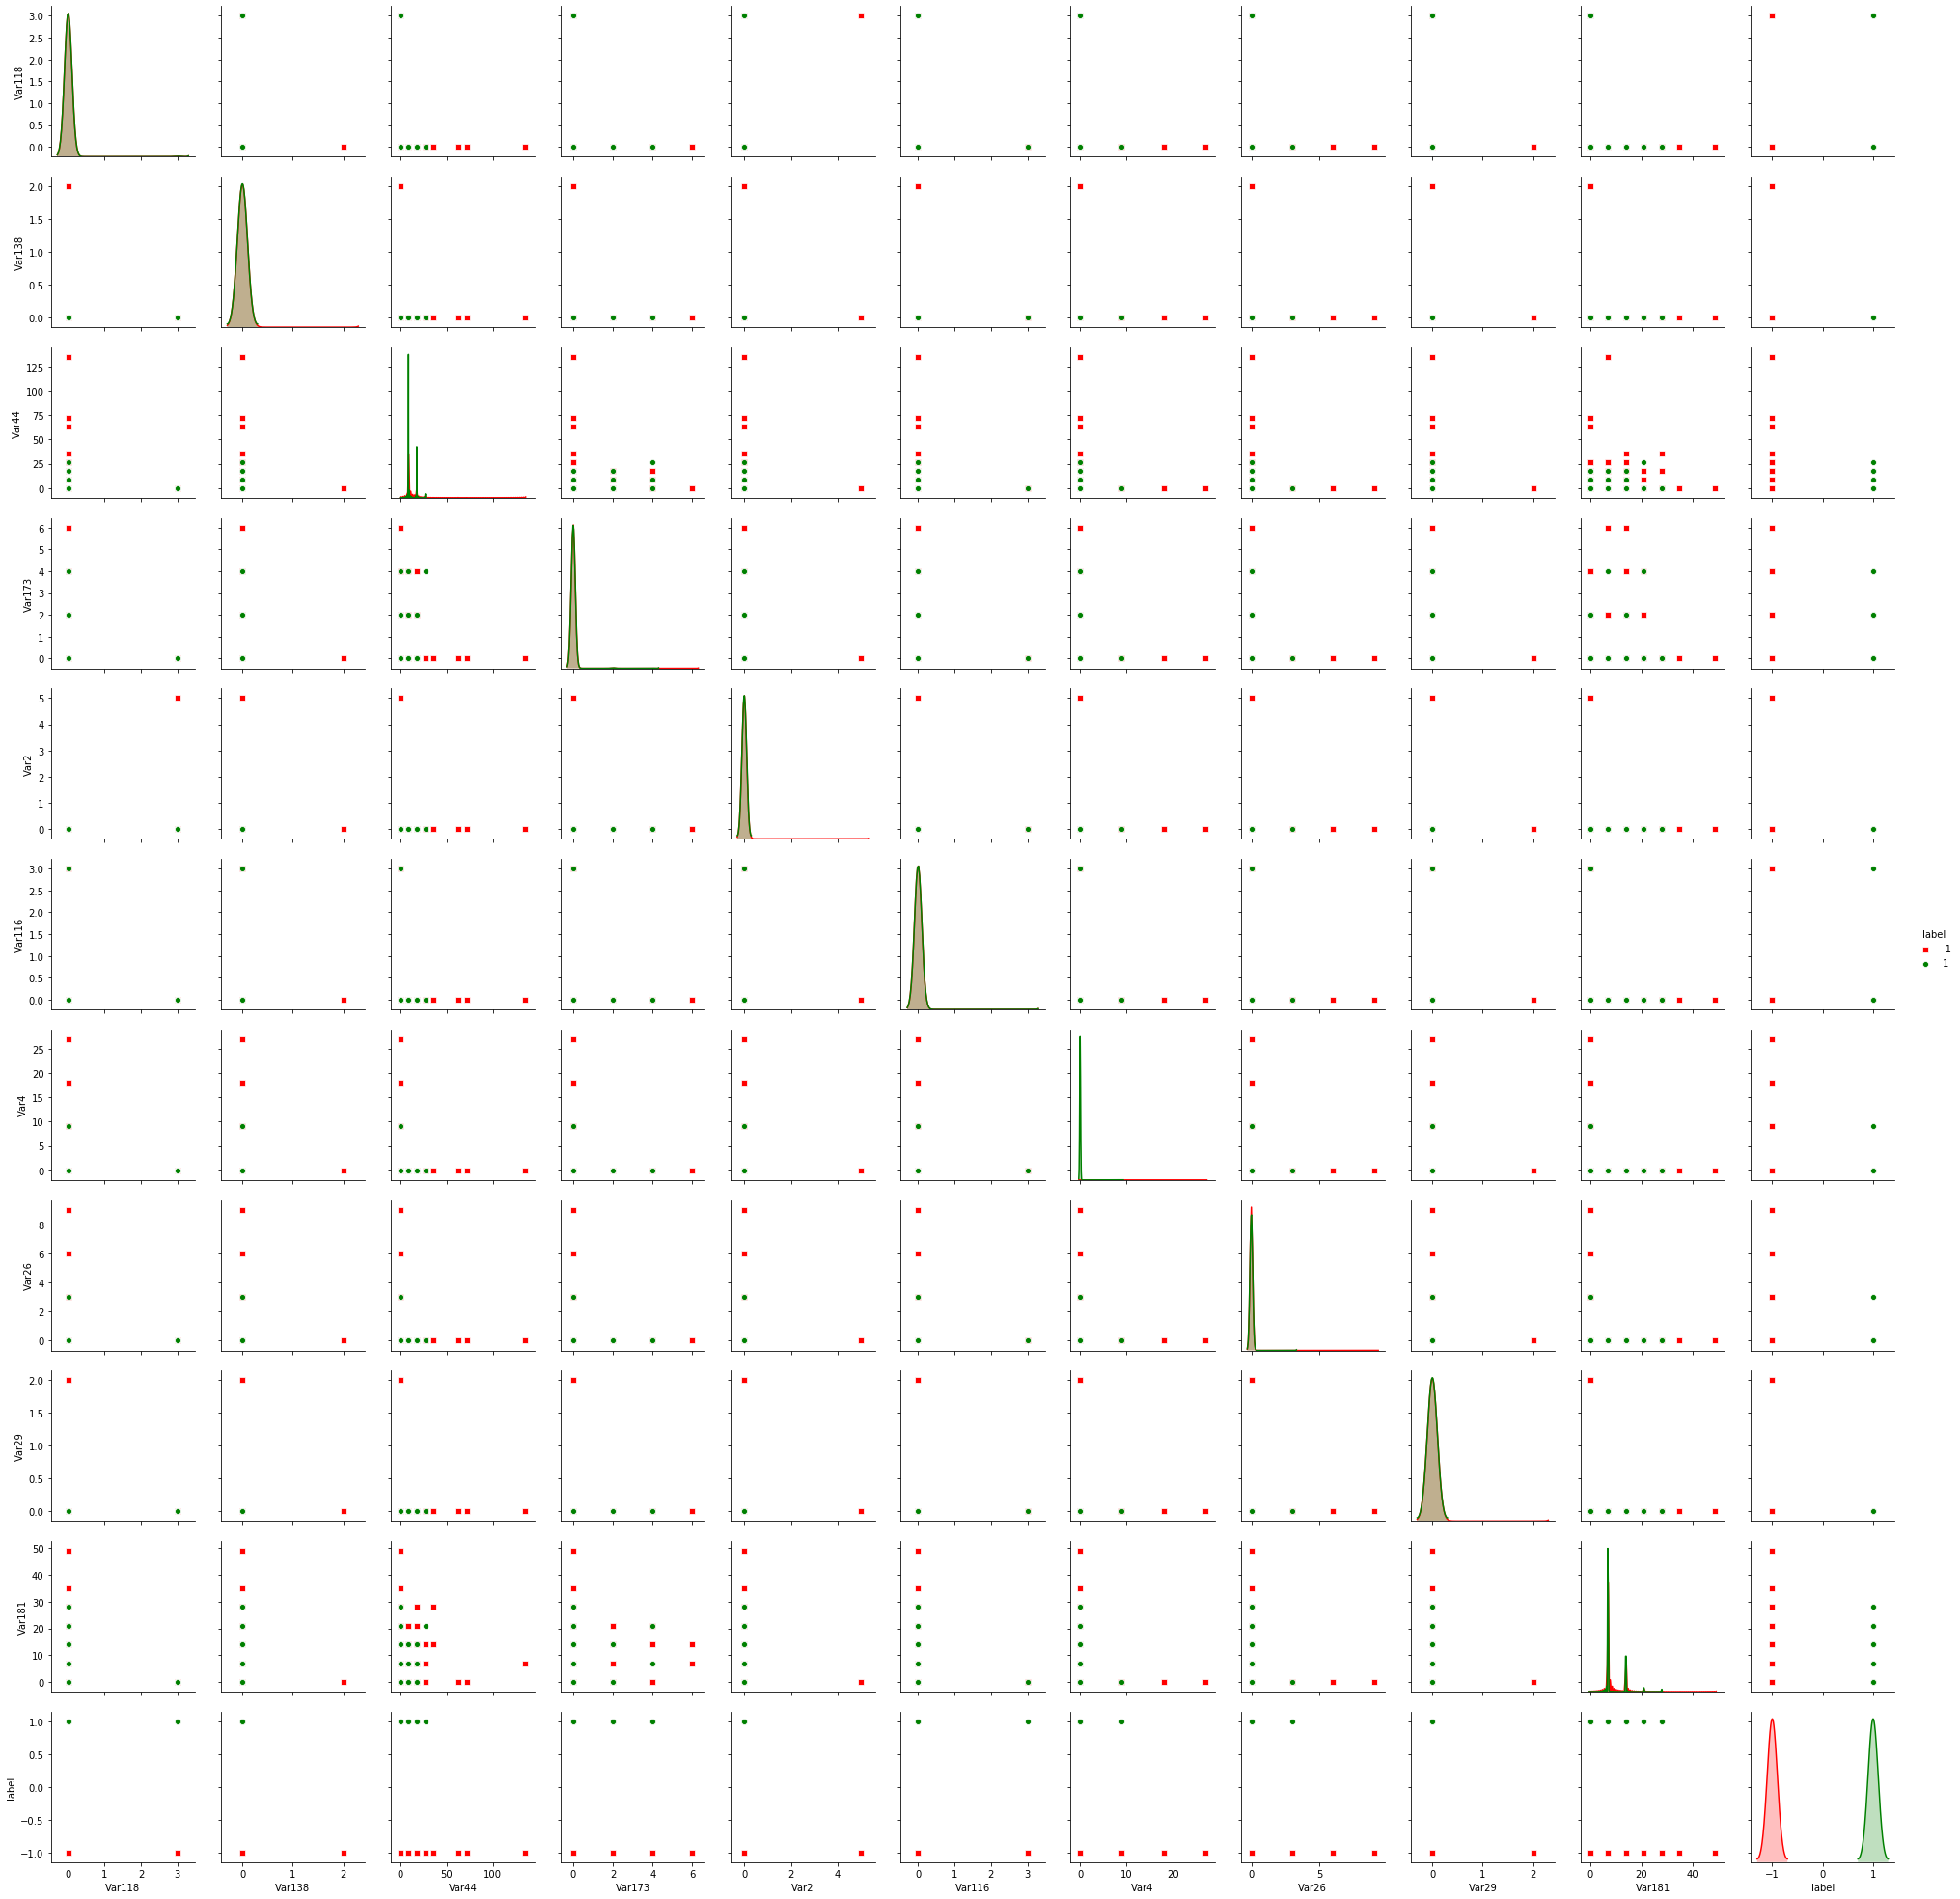

In [27]:
sns.pairplot(X_numeric[least_corr_num],
             hue='label',
             markers=['s','o'],
             palette=['r','g'], 
             diag_kws={'bw':0.1})


In [28]:
winsound.Beep(300, 700)

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

['Var218' 'Var205' 'Var229' 'Var225' 'Var227' 'Var210' 'Var221' 'Var226'
 'Var211' 'Var204' 'Var201' 'Var213' 'Var194' 'Var191' 'Var208' 'Var224'
 'Var223' 'Var215']


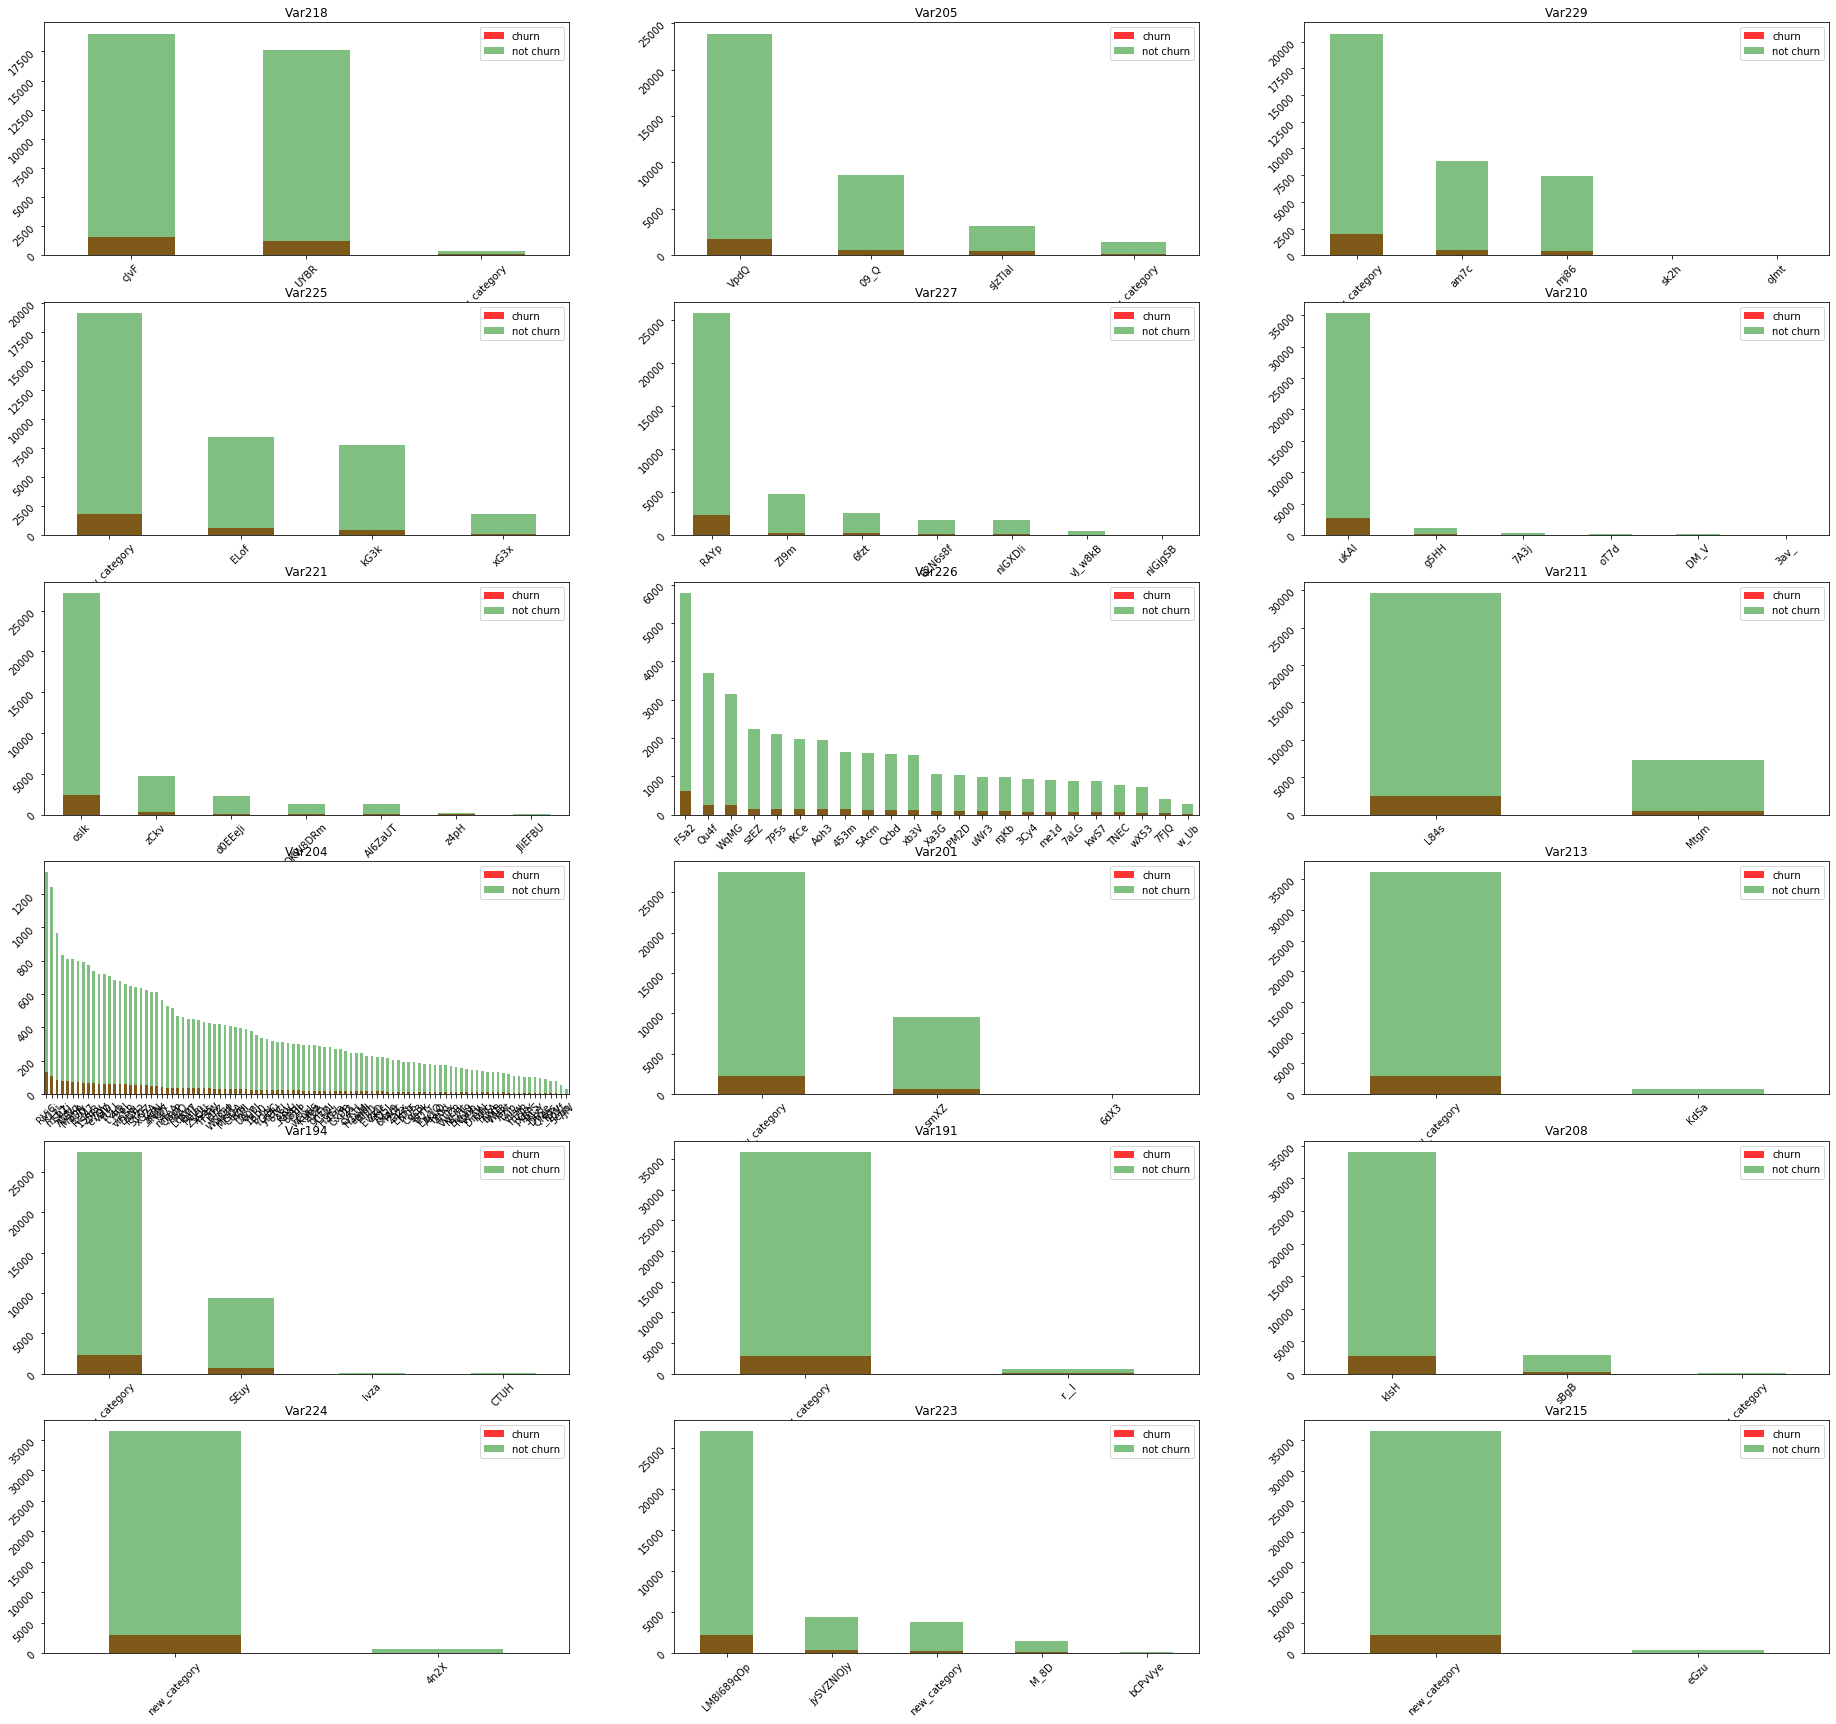

In [26]:
top_10_categorial = np.array(sorted(category_corrs))[:,1]
print(top_10_categorial)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(32, 30))
for i, var in enumerate(top_10_categorial):
#     print(var)
    data.loc[data.label==1,var].value_counts().plot(kind='bar', ax=axes[i//3, i%3], 
                                     alpha=0.8,color='r',label='churn', legend=True)
    data.loc[data.label==-1,var].value_counts().plot(kind='bar', ax=axes[i//3, i%3], 
                                      alpha=0.5,color='g',label='not churn',legend=True)
    axes[i//3, i%3].set_title(var)
    for xtick in axes[i//3, i%3].get_xticklabels():
        xtick.set_rotation(45)
        
    for ytick in axes[i//3, i%3].get_yticklabels():
        ytick.set_rotation(45)

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

1. Очень большая доля пропусков в данных, вследствие чего возникает трудность с тем, как правильно учесть или заполнить данные пропуски. Присутсвую признаки, в которых вообще нет информации:

['Var8', 'Var15', 'Var20', 'Var31', 'Var32', 'Var39', 'Var42','Var48', 'Var52', 'Var55', 'Var79', 'Var141', 'Var167', 'Var169','Var175', 'Var185', 'Var209', 'Var230']

2. Несбалансированная выборка

3. Числовые признаки, которые сильнее всего коррелируют с целевой переменной, имеют довольно сильный разброс. Признаки, наименее коррелированные с целевой переменной, наоборот, имеют довольно низкую дисперсию. Они принимают ограниченное число значений, поэтому, возможно, их стоит рассматривать как категориальрные перемнные и учесть в дальнейшем анализе.

4. Для категориальных переменных наиболее коррелированными по большей части являются те, которые заполнены больше всего и кактегории которых наиболее выражены.


Вывод: следует исключить признаки в которых нет данных; наиболее полезными будут признаки, значения которых сильно варьируются; наиболее значимый вклад из категориальых переменных внесут те, которые больше заполнены; следует рассмотреть числовые признаки, принимающие только несколько значений, как категориальные, если доля пропусков в них не очень велика. Отбор признаков должен быть полезен для построения модели, так как их очень много и не се из них несут полезную информацию, особенно те,  которые не заполнены совсем.